In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = './test_data/'

In [3]:
current_log = pd.read_csv(data_dir + 'current_log.csv', index_col=0)
forcast_log = pd.read_csv(data_dir + 'weather_log.csv', index_col=0)

In [4]:
times_lst = ['reception_time', 'reference_time', 'sunrise_time', 'sunset_time']

for col_n in times_lst:
    current_log[col_n] = pd.to_datetime(current_log[col_n], unit='s')

for col_n in times_lst:
    forcast_log[col_n] = pd.to_datetime(forcast_log[col_n], unit='s')

In [5]:
current_log.head(5)

,park_name,reception_time,reference_time,sunrise_time,sunset_time,clouds,rain_1h,snow_1h,wind_speed,wind_deg,humidity,press,temp,temp_feels,temp_max,temp_min,status,detailed_status
0,Prospect Park,2020-04-04 08:38:33,2020-04-04 08:38:33,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.25,0,5.1,40,93,1016,46.40,38.70,48.20,44.6,Rain,light rain
1,Prospect Park,2020-04-04 09:00:05,2020-04-04 09:00:04,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.25,0,4.6,40,93,1016,46.60,39.56,48.20,44.6,Rain,light rain
2,Prospect Park,2020-04-04 09:10:03,2020-04-04 09:10:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.6,40,93,1016,46.69,39.67,48.20,44.6,Rain,light rain
3,Prospect Park,2020-04-04 09:20:03,2020-04-04 09:20:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.6,40,93,1016,46.85,39.87,48.20,45.0,Rain,light rain
4,Prospect Park,2020-04-04 09:30:03,2020-04-04 09:30:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.1,50,93,1016,47.05,40.75,48.99,45.0,Rain,light rain


In [6]:
forcast_log.head(5)

,park_name,reception_time,reference_time,sunset_time,sunrise_time,clouds,rain,snow,wind_speed,wind_deg,humidity,press,press_sea,temp,temp_feels,temp_max,temp_min,status,detailed_status
0,Prospect Park,2020-04-03 15:31:35,2020-04-03 17:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,100,0.31,0,8.76,0,76,1006,1006,52.68,40.55,52.68,50.07,Rain,light rain
1,Prospect Park,2020-04-03 15:31:35,2020-04-03 20:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,100,0.18,0,8.29,6,77,1009,1009,51.94,40.32,51.94,49.98,Rain,light rain
2,Prospect Park,2020-04-03 15:31:35,2020-04-03 23:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,99,0.00,0,7.70,11,75,1011,1011,50.86,39.60,50.86,49.57,Clouds,overcast clouds
3,Prospect Park,2020-04-03 15:31:35,2020-04-04 02:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,94,0.00,0,6.33,14,76,1012,1012,49.15,39.34,49.15,48.51,Clouds,overcast clouds
4,Prospect Park,2020-04-03 15:31:35,2020-04-04 05:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,98,0.00,0,5.54,5,78,1013,1013,47.95,39.02,47.95,47.95,Clouds,overcast clouds


## Current conditions log
---
Current weather in the park was recorded every 10 minutes.

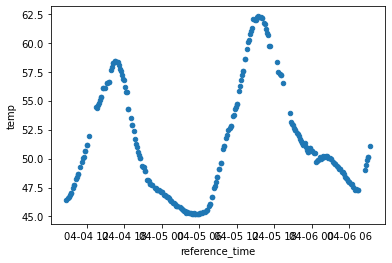

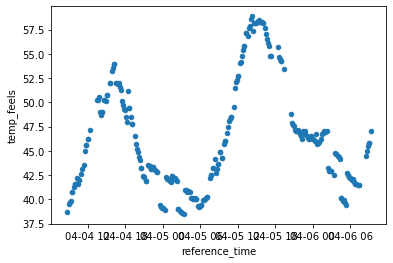

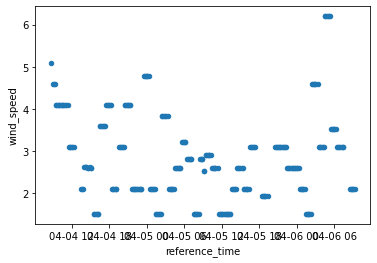

In [7]:
current_log.plot.scatter(x='reference_time', y='temp')
current_log.plot.scatter(x='reference_time', y='temp_feels')
current_log.plot.scatter(x='reference_time', y='wind_speed')

## Forcast log
---
5 day / 3 hour forecast data

In [8]:
forcast_times_today = [pd.Timestamp('02:00:00'), pd.Timestamp('05:00:00'),
                       pd.Timestamp('08:00:00'), pd.Timestamp('11:00:00'),
                       pd.Timestamp('14:00:00'), pd.Timestamp('17:00:00'),
                       pd.Timestamp('20:00:00'), pd.Timestamp('23:00:00')]

In [9]:
time_now = pd.Timestamp.now()

In [10]:
# get time of next forcast
time_diff = [x - time_now for x in forcast_times_today]

min_diff = min(x for x in time_diff if x > pd.Timedelta('0 days 00:00:00'))

next_forcast = forcast_times_today[time_diff.index(min_diff)]

In [11]:
filter1 = forcast_log['reference_time'] == next_forcast

In [12]:
# Most recent prediction
print('Current date & time: {}'.format(time_now))
forcast_log.where(filter1).dropna().iloc[[-1]]

Current date & time: 2020-04-10 14:56:26.104038


,park_name,reception_time,reference_time,sunset_time,sunrise_time,clouds,rain,snow,wind_speed,wind_deg,humidity,press,press_sea,temp,temp_feels,temp_max,temp_min,status,detailed_status
874,Prospect Park,2020-04-06 08:00:07,2020-04-10 17:00:00,2020-04-06 19:25:27,2020-04-06 06:30:14,99.0,0.0,0.0,7.72,268.0,46.0,997.0,997.0,50.68,37.18,50.68,50.68,Clouds,overcast clouds
